In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [33]:
df = pd.read_csv("customer_segmentation.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [35]:
object_columns = df.select_dtypes(include="object").columns.tolist()

In [36]:
object_columns

['Education', 'Marital_Status', 'Dt_Customer']

In [37]:
df["Education"].value_counts().index.tolist()

['Graduation', 'PhD', 'Master', '2n Cycle', 'Basic']

In [38]:
def set_collumn_mapping(df, col_type):
    object_columns = df.select_dtypes(include=[col_type]).columns.tolist()
    print(object_columns)

    for col in object_columns:
        res = {}
        for x, value in enumerate(df[col].value_counts().index.tolist()):
            res[value] = x
        print(res)
        df[col] = df[col].map(res)

    return df
            
    

In [39]:
set_collumn_mapping(df, object)

['Education', 'Marital_Status', 'Dt_Customer']
{'Graduation': 0, 'PhD': 1, 'Master': 2, '2n Cycle': 3, 'Basic': 4}
{'Married': 0, 'Together': 1, 'Single': 2, 'Divorced': 3, 'Widow': 4, 'Alone': 5, 'Absurd': 6, 'YOLO': 7}
{'31-08-2012': 0, '12-09-2012': 1, '14-02-2013': 2, '12-05-2014': 3, '20-08-2013': 4, '22-05-2014': 5, '05-04-2014': 6, '23-03-2014': 7, '02-01-2013': 8, '01-03-2014': 9, '29-10-2012': 10, '29-08-2012': 11, '23-05-2014': 12, '05-04-2013': 13, '09-11-2012': 14, '28-10-2013': 15, '17-08-2012': 16, '31-08-2013': 17, '07-11-2013': 18, '11-05-2013': 19, '11-05-2014': 20, '22-08-2012': 21, '12-01-2013': 22, '23-11-2012': 23, '03-11-2012': 24, '03-06-2013': 25, '04-06-2013': 26, '30-03-2014': 27, '23-11-2013': 28, '13-04-2013': 29, '17-03-2014': 30, '04-10-2013': 31, '10-01-2013': 32, '22-05-2013': 33, '07-02-2014': 34, '02-10-2013': 35, '25-10-2013': 36, '13-02-2013': 37, '16-02-2013': 38, '07-08-2013': 39, '26-01-2014': 40, '08-08-2012': 41, '02-05-2014': 42, '16-01-2013': 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,0,2,58138.0,0,0,224,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,0,2,46344.0,1,1,91,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,0,1,71613.0,0,0,269,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,0,1,26646.0,1,0,144,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,1,0,58293.0,1,0,321,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,0,0,61223.0,0,1,146,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,1,1,64014.0,2,1,374,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,0,3,56981.0,0,0,135,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,2,1,69245.0,0,1,285,8,428,...,3,0,0,0,0,0,0,3,11,0


In [40]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,0,2,58138.0,0,0,224,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,0,2,46344.0,1,1,91,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,0,1,71613.0,0,0,269,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,0,1,26646.0,1,0,144,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,1,0,58293.0,1,0,321,94,173,...,5,0,0,0,0,0,0,3,11,0


<AxesSubplot: >

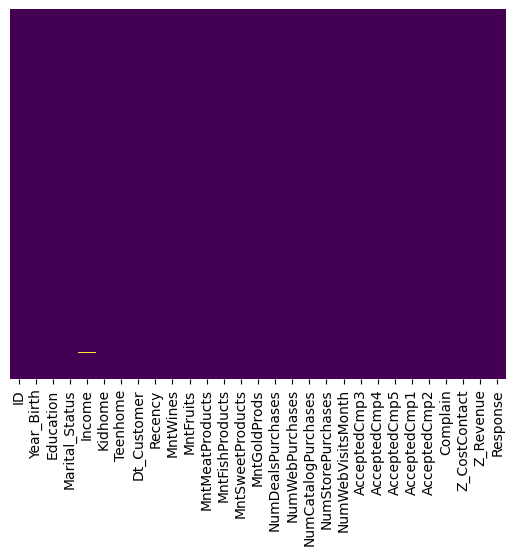

In [41]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [42]:
df.dropna(subset=["Income"], inplace=True)

<AxesSubplot: >

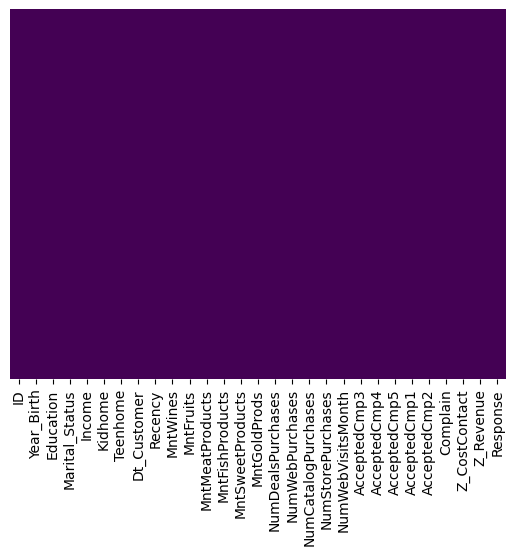

In [43]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [44]:
scalar = StandardScaler()
scalar.fit(df)
scaled_data = scalar.transform(df)

In [45]:
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [46]:
featured_pca = pca.transform(scaled_data)

In [47]:
scaled_data.shape, featured_pca.shape

((2216, 29), (2216, 2))

Text(0, 0.5, 'PC2')

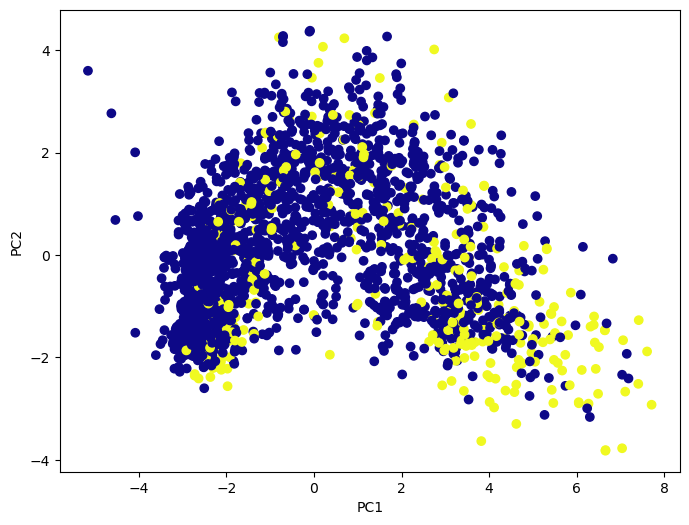

In [50]:

plt.figure(figsize=(8,6))
plt.scatter(featured_pca[:,0], featured_pca[:,1], c=df['Response'], cmap="plasma")
plt.xlabel("PC1")
plt.ylabel("PC2")

In [51]:
pca.components_

array([[-0.00503581, -0.05781419, -0.04756597,  0.01671579,  0.29139737,
        -0.25505725, -0.05600527, -0.0131568 ,  0.00088698,  0.30549313,
         0.26598807,  0.31394515,  0.27572435,  0.26890036,  0.22140663,
        -0.05511126,  0.2119796 ,  0.31814452,  0.2822987 , -0.24665194,
         0.01991825,  0.09589259,  0.19191274,  0.17116005,  0.05861211,
        -0.01538105,  0.        ,  0.        ,  0.10823594],
       [-0.02480809, -0.33994128, -0.07247653,  0.033663  ,  0.06870531,
        -0.09565902,  0.53794151,  0.0378327 ,  0.0397922 ,  0.16059557,
        -0.09893903, -0.12533212, -0.10956809, -0.09079587,  0.10349865,
         0.45633972,  0.35590507,  0.01342327,  0.20529245,  0.16740269,
        -0.08761362,  0.11372857, -0.17144436, -0.14276011,  0.00175537,
        -0.00062211,  0.        ,  0.        , -0.11520384]])

In [52]:
df_components = pd.DataFrame(pca.components_, columns=df.columns)
df_components

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,-0.005036,-0.057814,-0.047566,0.016716,0.291397,-0.255057,-0.056005,-0.013157,0.000887,0.305493,...,-0.246652,0.019918,0.095893,0.191913,0.17116,0.058612,-0.015381,0.0,0.0,0.108236
1,-0.024808,-0.339941,-0.072477,0.033663,0.068705,-0.095659,0.537942,0.037833,0.039792,0.160596,...,0.167403,-0.087614,0.113729,-0.171444,-0.14276,0.001755,-0.000622,0.0,0.0,-0.115204


<AxesSubplot: >

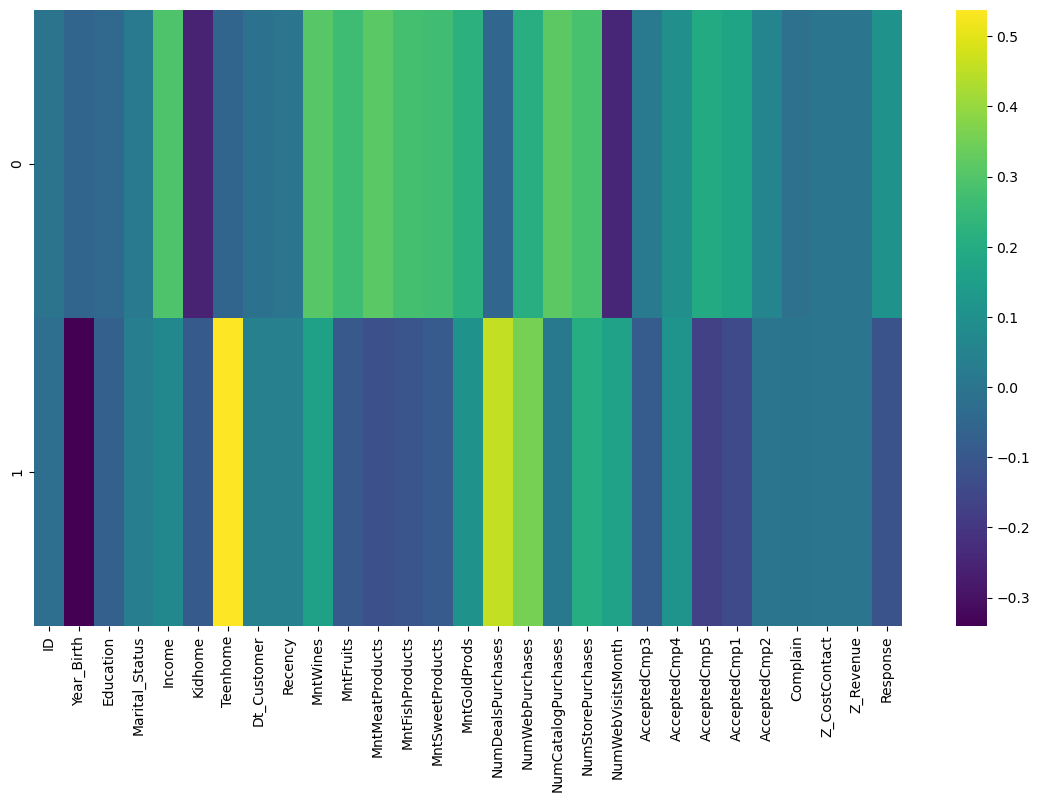

In [53]:

plt.figure(figsize=(14,8))
sns.heatmap(df_components, cmap="viridis")

In [55]:

featured_pca

array([[ 3.81844196,  0.01076705],
       [-2.3111161 ,  0.30365297],
       [ 1.65101336,  0.16129214],
       ...,
       [ 1.53027919,  0.07232014],
       [ 1.69571513,  1.21818728],
       [-1.71052745,  0.65063687]])

In [57]:

new_useful_data = pd.DataFrame(featured_pca)

In [58]:

new_useful_data

,0,1
0,3.818442,0.010767
1,-2.311116,0.303653
2,1.651013,0.161292
3,-2.476387,-1.371292
4,-0.488679,-0.162382
...,...,...
2211,2.394945,1.499680
2212,-0.983973,2.411101
2213,1.530279,0.072320
2214,1.695715,1.218187
